In [1]:
#simple brute force solution
def is_prime_bad(x: int)->bool:
    for i in range(2, x):
        if x%i == 0:
            return False
    return True

print(f"{is_prime_bad(3) = }")

#counting primes up to 10_000
prime_count_bad = 0
#this takes ~24 seconds on my pc
for i in range(2, 100_000):
    if is_prime_bad(i):
        prime_count_bad += 1

print(f"there are {prime_count_bad} prime numbers from 2 up to 100_000")

is_prime_bad(3) = True
there are 9592 prime numbers from 2 up to 100_000


# We can Optimize that prime number detection algorithm using following proof:
A given number $x \in \mathbb{N}, x \geq 2$ is not a prime number, meaning there are 2 factors $a, b \in \mathbb{N}\setminus \{1\}$ to write: $x = a\cdot b$.<br>
Now we make the assumption: $a^2 \leq x \lor b^2 \leq x$.<br>
Negating that assumption with De Morgan's laws would mean: $\overline{a^2 \leq x \lor b^2 \leq x} = a^2 > x \land b^2 > x$<br>
But that would mean $a^2\cdot b^2 > x^2$. That is a contradiction(⚡) to $x = a\cdot b$. <br>
That means our original assumption is correct. <br>
That means for one of the factors $a, b\in \mathbb{N} \setminus \{1\}$ of x: $a \leq \sqrt{x} \lor b \leq \sqrt{x}$
<br>
That can be used to speed up our algorithm to detect wether a given number $x$ is $\in \mathbb{P}$( a prime number).

In [2]:
from math import sqrt

def is_prime(x: int)->bool:
    for i in range(2, int(sqrt(x))+1):
        if x%i == 0:
            return False
    return True

#counting primes up to 10_000
prime_count = 0
#this only took 0.2 seconds on my pc...
for j in range(2, 100_000):
    if is_prime(j):
        prime_count += 1

print(f"there are {prime_count} prime numbers from 2 up to 100_000")

there are 9592 prime numbers from 2 up to 100_000


In [3]:
from typing import List
#now we can also find the prime factorization of a number:

def prime_factorization(x: int) -> List[int]:
    prime_factor = 2
    prime_factors = []
    while x > 1:
        if is_prime(prime_factor) and x%prime_factor == 0:
            prime_factors.append(prime_factor)
            x //= prime_factor
            prime_factor = 2
            continue
        prime_factor += 1
    return prime_factors

print(f"{prime_factorization(3*5*7*8) = }")
print(f"{prime_factorization(8**3) = }")

prime_factorization(3*5*7*8) = [2, 2, 2, 3, 5, 7]
prime_factorization(8**3) = [2, 2, 2, 2, 2, 2, 2, 2, 2]


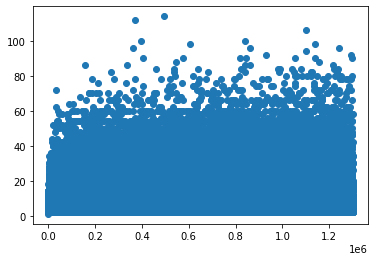

In [4]:
# given a prime number x: search for the next prime number and the gap. (returned in Tuple in order mentioned before)
import matplotlib.pyplot as plt
from typing import Tuple
def prime_gap(x: int)->Tuple[int, int]:
    i = x+1
    gap = 1
    while True:
        if is_prime(i):
            return (i, gap)
        i += 1
        gap += 1

prime_gaps = []
primes = []
next_prime = 2
for i in range(100_000):
    previous_prime = next_prime
    (next_prime, gap) = prime_gap(next_prime)
    #print(f"{previous_prime = } {next_prime = }")
    prime_gaps.append(gap)
    primes.append(next_prime)

#print(f"{prime_gaps = } {primes = }")
#plotting prime_gaps
plt.scatter(primes, prime_gaps)

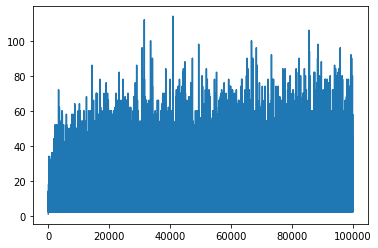

In [5]:
plt.plot(prime_gaps)

In [6]:
import pandas as pd
#this has to be set to display N entries where N can be 1000?
N = 50
pd.set_option("display.max_rows", N)
#only showing the last 1000 entries ... (showing all 100_000 entrys was slow on my computer...)
pd.DataFrame(data = {"prime": primes[100_000-N:], "gap to previous prime": prime_gaps[100_000-N:]})

,prime,gap to previous prime
0,1299029,10
1,1299041,12
2,1299059,18
3,1299061,2
4,1299079,18
5,1299097,18
6,1299101,4
7,1299143,42
8,1299169,26
9,1299173,4


In [19]:
#simple implementation of the euclidean algorithm: greatest common divisor
def greatest_common_divisor(a: int, b: int)->int:
    if a < b:
        return greatest_common_divisor(b, a)
    while True:
        c = a%b
        if c == 0:
            return b
        a, b = b, c

# solves equation greatest_common_divisor(a, b) = s * a + t * b, returns (ggT(a, b), s, t)
def extended_euclid(a: int, b: int):
    if b == 0:
        return (a, 1, 0)
    (d1, s1, t1) = extended_euclid(b, a%b)
    (d, s, t) = (d1, t1, s1 - (a//b)*t1)
    return (d, s, t)

def modular_inverse(a: int, b: int)->int:
    g, x, y = extended_euclid(a, b)
    if g != 1:
        raise ValueError(f"modular inverse of {(a, b) = } does not exist.")
    else:
        return x % b

#calculates private key from public RSA key (n, e) where (n = p*q) and greatest_common_divisor(p-1, e) == greatest_common_divisor(q, e) == 1 and p and q are prime numbers.
def calculate_private_key(n: int, e: int)->int:
    [p, q] = prime_factorization(n)
    phi = (p-1)*(q-1)
    #print(f"{greatest_common_divisor(p-1, e) = } {greatest_common_divisor(q-1, e) = }")
    if greatest_common_divisor(p-1, e) != 1 or greatest_common_divisor(q-1, e) != 1:
        raise ValueError(f"invalid public key {(n, e) = }")
    return modular_inverse(e, phi)
#the public key of a message encrypted with RSA: (n, e) = (7387, 1357)
# the encoded message: 2133 429 1126
print(f" {is_prime(7387) = }")
print(f" {is_prime(1357) = }")
print(f" factor n into (p, q): {prime_factorization(7387) = }")
n_factorization = prime_factorization(7387)
p_minus_1 = n_factorization[0]-1
q_minus_1 = n_factorization[1]-1
print(f" check (p - 1) = {p_minus_1 = } and (q-1) = {q_minus_1 = } have greates common divisor 1 with e: {greatest_common_divisor(p_minus_1, 1357) = }; {greatest_common_divisor(q_minus_1, 1357) = }")
#calculate euler function value:
print(f"φ(N) = φ(7387) = (p-1)*(q-1) = {p_minus_1 * q_minus_1} = 7216")
#the secret/ private key is: k = 318 ... or so I thought:
print(f"calculate inverse of e mod φ(N): {greatest_common_divisor(1357, 7216) = } = 1357 * d + k * 7216 \nsolve: (greatest_common_divisor(1357, 7216), d, k) = {extended_euclid(1357, 7216) = }")

print(f"greatest_common_divisor(1357, 7216) = 1 = 1357* (-1691) + 7216 * 318.{calculate_private_key(7387, 1357) = }, {calculate_private_key(1357, 7387) = }")
print(f"decrypted message: {(2133**5525) % 7387 =}")
print(f"decrypted message: {(429**5525) % 7387 =}")
print(f"decrypted message: {(1126**5525) % 7387 =}")
print(f"reverse reversal encryption: {((2133**5525 % 7387) ** 1357) % 7387 = }")
print(f"reverse reversal encryption: {((429**5525 % 7387) ** 1357) % 7387  = }")
print(f"reverse reversal encryption: {((1126**5525 % 7387) ** 1357) % 7387  = }")
print(f"example from https://de.wikipedia.org/wiki/RSA-Kryptosystem {calculate_private_key(143, 23) = } =? 47")
print(f"example from https://www.dcode.fr/rsa-cipher {calculate_private_key(1022117, 101) = } =? 767597")

 is_prime(7387) = False
 is_prime(1357) = False
 factor n into (p, q): prime_factorization(7387) = [83, 89]
 check (p - 1) = p_minus_1 = 82 and (q-1) = q_minus_1 = 88 have greates common divisor 1 with e: greatest_common_divisor(p_minus_1, 1357) = 1; greatest_common_divisor(q_minus_1, 1357) = 1
φ(N) = φ(7387) = (p-1)*(q-1) = 7216 = 7216
calculate inverse of e mod φ(N): greatest_common_divisor(1357, 7216) = 1 = 1357 * d + k * 7216 
solve: (greatest_common_divisor(1357, 7216), d, k) = extended_euclid(1357, 7216) = (1, -1691, 318)
greatest_common_divisor(1357, 7216) = 1 = 1357* (-1691) + 7216 * 318.calculate_private_key(7387, 1357) = 5525, calculate_private_key(1357, 7387) = 1091
decrypted message: (2133**5525) % 7387 =2431
decrypted message: (429**5525) % 7387 =2312
decrypted message: (1126**5525) % 7387 =1528
reverse reversal encryption: ((2133**5525 % 7387) ** 1357) % 7387 = 2133
reverse reversal encryption: ((429**5525 % 7387) ** 1357) % 7387  = 429
reverse reversal encryption: ((1126

In [20]:
CODE_TABLE = {}
for i in range(ord("a"), ord("z")+1):
    CODE_TABLE[str(i-ord("a")+11)] = chr(i) # (A, 11) (B, 12) ... (Z, 36)

from typing import Tuple, List

def decrypt_message(n: int, e: int, message: List[int])->str:
    secret_key = calculate_private_key(n, e)
    decrypted = [(i**secret_key) % n for i in message]
    result = ""
    #get the decrypted message into the right format...
    for letters in decrypted:
        letters = str(letters)
        while letters != "":
            result += CODE_TABLE[letters[0:2]]
            letters = letters[2:]
    return result

print(f"{decrypt_message(n = 7387, e = 1357, message=[2133, 429, 1126]) = }")

decrypt_message(n = 7387, e = 1357, message=[2133, 429, 1126]) = 'number'


In [9]:
print(extended_euclid(7216, 1357))
print(extended_euclid(1357, 7216))

print(f"{modular_inverse(1357, 7216) = }")
print(f"{modular_inverse(7216, 1357) = }")
print(f"{modular_inverse(23, 120) = }")
print(f"{modular_inverse(120, 23) = }")



(1, 318, -1691)
(1, -1691, 318)
modular_inverse(1357, 7216) = 5525
modular_inverse(7216, 1357) = 318
modular_inverse(23, 120) = 47
modular_inverse(120, 23) = 14


Disprove Statement: $\forall n\in\mathbb{N}:\,p_n=n^2-n+41$ is prime

In [10]:
n = 0
second = 0
while True:
    p_n = n*(n-1)+41
    if not is_prime(p_n):
        second += 1
        print(f"Statement not True for {n = } {p_n = }")
        if second == 5:
            break
    n += 1

Statement not True for n = 41 p_n = 1681
Statement not True for n = 42 p_n = 1763
Statement not True for n = 45 p_n = 2021
Statement not True for n = 50 p_n = 2491
Statement not True for n = 57 p_n = 3233


In [11]:
def greatest_divisor(p: int):
    for i in range(p-1, 0, -1):
        if p%i == 0:
            return i
    return p

print(f"{greatest_divisor(1681) = }")
print(f"{greatest_divisor(1763) = }")

greatest_divisor(1681) = 41
greatest_divisor(1763) = 43
